# Data Modelling
***

Evaluation of metrics

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [18]:
df = pd.read_csv('diabetes_encoded.csv')

##### BASELINE MODELS
###### LR AND SVM: MOST FREQUENT CLASS
###### DT: SHALLOWEST TREE

In [20]:
df.set_index('encounter_id', inplace=True)
y = df['readmitted']
X = df.drop('readmitted', axis=1)

In [23]:
from sklearn.model_selection import train_test_split
from collections import Counter
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print('Original training dataset shape {}'.format(Counter(y_train)))
print('Original testing dataset shape {}'.format(Counter(y_test)))

Original training dataset shape Counter({0: 43912, 1: 37500})
Original testing dataset shape Counter({0: 10952, 1: 9402})


In [25]:
from sklearn.dummy import DummyClassifier
# Train LR and SVM Dummy Classifier
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [33]:
# Predict and evaluate Dummy Classifier
y_pred_base = baseline_model.predict(X_test)

# compute evaluation metrics
base_accuracy = accuracy_score(y_test, y_pred_base)
base_precision = precision_score(y_test, y_pred_base, average='binary')
base_recall = recall_score(y_test, y_pred_base, average='binary')
fpr, tpr, _ = roc_curve(y_test, y_pred_base)
base_auc = auc(fpr, tpr)
# print metrics
print(f'Baseline Model Accuracy (Most Frequent Class): {base_accuracy}')
print(f'Baseline Model (Most Frequent Class) Precision: {base_precision}')
print(f'Baseline Model (Most Frequent Class) Recall: {base_recall}')
print(f'Baseline Model (Most Frequent Class) AUC: {base_auc}')
# print count of values for each class currently in y to predict from
print(y.value_counts())

Baseline Model Accuracy (Most Frequent Class): 0.5380760538469097
Baseline Model (Most Frequent Class) Precision: 0.0
Baseline Model (Most Frequent Class) Recall: 0.0
Baseline Model (Most Frequent Class) AUC: 0.5
readmitted
0    54864
1    46902
Name: count, dtype: int64


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
# Initialize the baseline decision tree classifier with very shallow tree by setting the max_depth parameter to 1
dT_baseline_model = DecisionTreeClassifier(max_depth=1, random_state=42)
# Train the model
dT_baseline_model.fit(X_train, y_train)
# Predict on the test set
y_pred_dT_base = dT_baseline_model.predict(X_test)
# Evaluate the model
# compute evaluation metrics
dT_base_accuracy = accuracy_score(y_test, y_pred_dT_base)
dT_base_precision = precision_score(y_test, y_pred_dT_base, average='binary')
dT_base_recall = recall_score(y_test, y_pred_dT_base, average='binary')
dT_base_fpr, dT_base_tpr, _ = roc_curve(y_test, y_pred_dT_base)
dT_base_auc = auc(dT_base_fpr, dT_base_tpr)
# print the metrics
# print metrics
print(f'Baseline Model Accuracy (Shallowest Tree): {dT_base_accuracy}')
print(f'Baseline Model (Shallowest Tree) Precision: {dT_base_precision}')
print(f'Baseline Model (Shalloweset Tree) Recall: {dT_base_recall}')
print(f'Baseline Model (Shallowest Tree) AUC: {dT_base_auc}')
# print count of values for each class currently in y to predict from
print(y.value_counts())

Baseline Model Accuracy (Shallowest Tree): 0.6125577282106711
Baseline Model (Shallowest Tree) Precision: 0.6110460005859947
Baseline Model (Shalloweset Tree) Recall: 0.44362901510316954
Baseline Model (Shallowest Tree) AUC: 0.6006037697867929
readmitted
0    54864
1    46902
Name: count, dtype: int64


#### CLASSIFICATION MODELS
##### LOGISTIC REGRESSION
##### SUPPORT VECTOR MACHINE
##### DECISION TREE

In [47]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
log_model_scaled = LogisticRegression(max_iter=1000)
log_model_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_scaled_log = log_model_scaled.predict(X_test_scaled)

# compute evaluation metrics
log_accuracy_scaled = accuracy_score(y_test, y_pred_scaled_log)
log_precision_scaled = precision_score(y_test, y_pred_scaled_log, average='binary')
log_recall_scaled = recall_score(y_test, y_pred_scaled_log, average='binary')
log_fpr, log_tpr, _ = roc_curve(y_test, y_pred_scaled_log)
log_auc_scaled = auc(log_fpr, log_tpr)
# print the metrics
print(f'Logistic Regression Accuracy after scaling: {log_accuracy_scaled}')
print(f'Logistic Regression Precision after scaling: {log_precision_scaled}')
print(f'Logistic Regression Recall after scaling: {log_recall_scaled}')
print(f'Logistic Regression AUC after scaling: {log_auc_scaled}')

Logistic Regression Accuracy after scaling: 0.6250859781861059
Logistic Regression Precision after scaling: 0.6340245194490691
Logistic Regression Recall after scaling: 0.44554350138268456
Logistic Regression AUC after scaling: 0.6123809544897353


In [58]:
# Train Support Vector Machine model
svc_model_scaled = SVC(max_iter=5000)
svc_model_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate 
y_pred_scaled_svc = svc_model_scaled.predict(X_test_scaled)
# compute the evaluation metrics
svc_accuracy_scaled = accuracy_score(y_test, y_pred_scaled_svc)
svc_precision_scaled = precision_score(y_test, y_pred_scaled_svc, average='binary')
svc_recall_scaled = recall_score(y_test, y_pred_scaled_svc, average='binary')
svc_auc_scaled = roc_auc_score(y_test, y_pred_scaled_svc)
# print the metrics
print(f'Support Vector Machine Accuracy after scaling: {svc_accuracy_scaled}')
print(f'Support Vector Machine Precision after scaling: {svc_precision_scaled}')
print(f'Support Vector Machine Recall after scaling: {svc_recall_scaled}')
print(f'Support Vector Machine AUC after scaling: {svc_auc_scaled}')

C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Support Vector Machine Accuracy after scal: 0.4898791392355311
Support Vector Machine Precision: 0.46914512172107947
Support Vector Machine Recall: 0.7932354818123803
Support Vector Machine AUC: 0.5113456444854452


In [54]:
# Train the Decision Tree model
dT_model = DecisionTreeClassifier(random_state=42)
dT_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dT = dT_model.predict(X_test)

# compute evaluation metrics
dT_accuracy = accuracy_score(y_test, y_pred_dT)
dT_precision = precision_score(y_test, y_pred_dT, average='binary')
dT_recall = recall_score(y_test, y_pred_dT, average='binary')
dT_fpr, dT_tpr, _ = roc_curve(y_test, y_pred_dT)
dT_auc = auc(dT_fpr, dT_tpr)
# print the metrics
print(f'Decision Tree Accuracy: {dT_accuracy}')
print(f'Decision Tree Precision: {dT_precision}')
print(f'Decision Tree Recall: {dT_recall}')
print(f'Decision Tree AUC: {dT_auc}')

Decision Tree Accuracy: 0.5703055910386164
Decision Tree Precision: 0.5345845634753269
Decision Tree Recall: 0.5392469687300574
Decision Tree AUC: 0.5681077794709455


MODEL OPTIMISATION

Randomly sample a fraction of the dataset. This is particularly useful for faster model training and hyperparameter tuning.

In [62]:
# Sample a fraction (e.g., 10%) of the dataset
subset = df.sample(frac=0.05, random_state=42)  # 5% of the data

# Split the subset into features and target
X_subset = subset.drop('readmitted', axis=1)  
y_subset = subset['readmitted']

In [68]:
# X_subset

In [70]:
# y_subset

In [72]:
# Split data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_subset, y_subset, train_size=0.8, random_state=42)
print('Sample training dataset shape {}'.format(Counter(y_train_sample)))
print('Sample testing dataset shape {}'.format(Counter(y_test_sample)))

Sample training dataset shape Counter({0: 2167, 1: 1903})
Sample testing dataset shape Counter({0: 552, 1: 466})


REGULARISATION AND HYPERPARAMETER TUNING

In [76]:
from scipy.stats import uniform
# Randomized Search for Logistic Regression Hyperparameters
log_param_distributions = {
    'C': uniform(0.001, 10-0.001), # Regularization strength
    'penalty': ['l1', 'l2'], # Regularization type
    'solver': ['liblinear', 'saga'], # Solver
    'max_iter': [1000, 1500, 2000] # Maximum number of iterations
}

log_random_search = RandomizedSearchCV(
    estimator=log_model_scaled, 
    param_distributions=log_param_distributions,
    n_iter=10, # Number of parameter settings to sample 
    cv=5, # Number of folds in cross-validation 
    scoring='accuracy', # Metric to optimize
    verbose=1, # Verbosity level
    random_state=42 # For reproducibility
)
# Fit RandomizedSearchCV
log_random_search.fit(X_train_sample, y_train_sample)
# Print best parameters and best score
print(f"Best parameters for Logisitic Regression: {log_random_search.best_params_}")
print(f"Best score for Logistic Regression: {log_random_search.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Best parameters for Logisitic Regression: {'C': 3.7460266483547775, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.6125307125307125


In [78]:
# Train the final Logistic Regression model
best_model_log = log_random_search.best_estimator_
best_model_log.fit(X_train, y_train)
# Evaluate the final model
y_pred_final_log = best_model_log.predict(X_test)
accuracy_final_log = accuracy_score(y_test, y_pred_final_log)
precision_final_log = precision_score(y_test, y_pred_final_log, average='binary')
recall_final_log = recall_score(y_test, y_pred_final_log, average='binary')
fpr_final_log, tpr_final_log, _ = roc_curve(y_test, y_pred_final_log)
auc_final_log = auc(fpr_final_log, tpr_final_log)
# print the metrics
print(f'Optimised Logistic Regression Accuracy: {accuracy_final_log}')
print(f'Optimised Logistic Regression Precision: {precision_final_log}')
print(f'Optimised Logistic Regression Recall: {recall_final_log}')
print(f'Optimised Logistic Regression AUC: {auc_final_log}')

Optimised Logistic Regression Accuracy: 0.6250368477940454
Optimised Logistic Regression Precision: 0.6340502877915783
Optimised Logistic Regression Recall: 0.4452244203360987
Optimised Logistic Regression AUC: 0.6123127214901823


In [82]:
# Define the parameter distributions for SVC
svc_param_distributions = {
    'C': uniform(0.001, 10-0.001),  # Regularization parameter
    'gamma': uniform(0.001, 10-0.001),  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3, 4]  # Degree of the polynomial kernel function (only used if kernel='poly')
}

# Initialize RandomizedSearchCV
svc_random_search = RandomizedSearchCV(
    estimator=svc_model_scaled,
    param_distributions=svc_param_distributions,
    n_iter=10,  # Number of parameter settings to sample
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,  # Verbosity level
    random_state=42  # For reproducibility
)

# Fit RandomizedSearchCV
svc_random_search.fit(X_train_sample, y_train_sample)

# Print best parameters and best score
print(f"Best parameters for Support Vector Machine: {svc_random_search.best_params_}")
print(f"Best score for Support Vector Machine: {svc_random_search.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5

Best parameters for Support Vector Machine: {'C': 0.20682435846372868, 'degree': 3, 'gamma': 7.220265723895981, 'kernel': 'rbf'}
Best score for Support Vector Machine: 0.5324324324324323


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [86]:
# Train the final SVM model
best_model_svm = svc_random_search.best_estimator_
best_model_svm.fit(X_train, y_train)
# Evaluate the final model
y_pred_final_svm = best_model_svm.predict(X_test)
accuracy_final_svm = accuracy_score(y_test, y_pred_final_svm)
precision_final_svm = precision_score(y_test, y_pred_final_svm, average='binary')
recall_final_svm = recall_score(y_test, y_pred_final_svm, average='binary')
fpr_final_svm, tpr_final_svm, _ = roc_curve(y_test, y_pred_final_svm)
auc_final_svm = auc(fpr_final_svm, tpr_final_svm)
# print the metrics
print(f'Optimised Support Vector Machine Accuracy: {accuracy_final_svm}')
print(f'Optimised Support Vector Machine Precision: {precision_final_svm}')
print(f'Optimised Support Vector Machine Recall: {recall_final_svm}')
print(f'Optimised Support Vector Machine AUC: {auc_final_svm}')

C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Optimised Support Vector Machine Accuracy: 0.4618748157610298
Optimised Support Vector Machine Precision: 0.4618975089667371
Optimised Support Vector Machine Recall: 0.9998936396511381
Optimised Support Vector Machine AUC: 0.49994681982556904


In [88]:
# Randomized Search for Decision Tree Hyperparameters
# Define the parameter grid for DecisionTreeClassifier
dT_param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
dT_random_search = RandomizedSearchCV(
    estimator=dT_model, 
    param_distributions=dT_param_distributions,
    n_iter=10, # Number of parameter settings to sample 
    cv=5, # Number of folds in cross-validation 
    scoring='accuracy', # Metric to optimize
    verbose=1, # Verbosity level
    random_state=42 # For reproducibility
)
# Fit RandomizedSearchCV
dT_random_search.fit(X_train_sample, y_train_sample)
# Print best parameters and best score
print(f"Best parameters: {dT_random_search.best_params_}")
print(f"Best score: {dT_random_search.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
Best score: 0.5926289926289926


In [92]:
# Train the final Decision Tree model
best_model_dT = dT_random_search.best_estimator_
best_model_dT.fit(X_train, y_train)
# Evaluate the final model
y_pred_final_dT = best_model_dT.predict(X_test)
accuracy_final_dT = accuracy_score(y_test, y_pred_final_dT)
precision_final_dT = precision_score(y_test, y_pred_final_dT, average='binary')
recall_final_dT = recall_score(y_test, y_pred_final_dT, average='binary')
fpr_final_dT, tpr_final_dT, _ = roc_curve(y_test, y_pred_final_dT)
auc_final_dT = auc(fpr_final_dT, tpr_final_dT)
# print the metrics
print(f'Optimised Decision Tree Accuracy: {accuracy_final_dT}')
print(f'Optimised Decision Tree Precision: {precision_final_dT}')
print(f'Optimised Decision Tree Recall: {recall_final_dT}')
print(f'Optimised Decision Tree AUC: {auc_final_dT}')

Optimised Decision Tree Accuracy: 0.6322098850348826
Optimised Decision Tree Precision: 0.6115510013972986
Optimised Decision Tree Recall: 0.5586045522229313
Optimised Decision Tree AUC: 0.6270013265132187


VISUALISATIONS

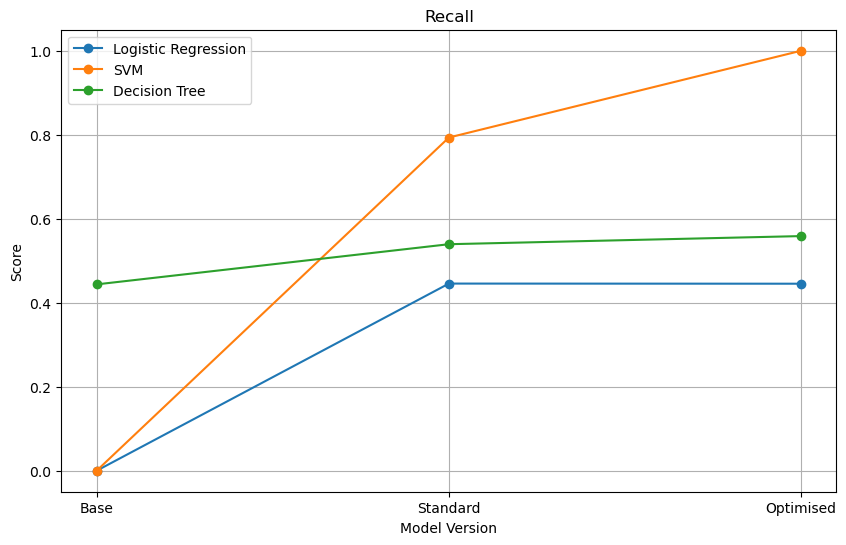

In [108]:
# Model Performance Evaluation: Recall
model_versions = ['Base', 'Standard', 'Optimised']
recall_log = [base_recall, log_recall_scaled, recall_final_log]
recall_svm = [base_recall, svc_recall_scaled, recall_final_svm]
recall_dT = [dT_base_recall, dT_recall, recall_final_dT]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(model_versions, recall_log, marker='o', label='Logistic Regression')
plt.plot(model_versions, recall_svm, marker='o', label='SVM')
plt.plot(model_versions, recall_dT, marker='o', label='Decision Tree')

# plt.plot(model_versions, accuracy, marker='o', label='Accuracy')

plt.xlabel('Model Version')
plt.ylabel('Score')
plt.title('Recall')
plt.legend()
plt.grid(True)
plt.savefig('Recall.png', dpi=300)
plt.show()

In [146]:
print('Optimised Decision Tree Recall:', recall_final_dT)
print('Optimised SVM Recall:', recall_final_svm)
print('Optimised Logistic Regression Recall:', recall_final_log)

Optimised Decision Tree Recall: 0.5586045522229313
Optimised SVM Recall: 0.9998936396511381
Optimised Logistic Regression Recall: 0.4452244203360987


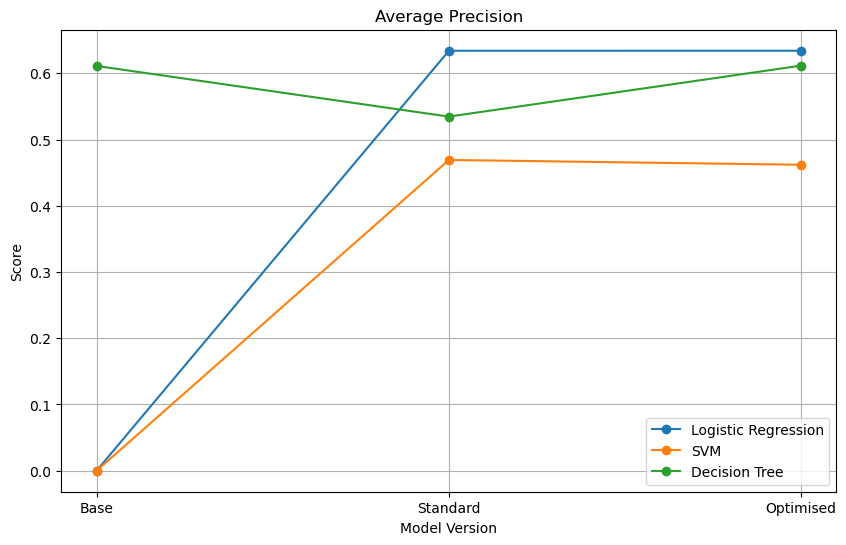

In [110]:
# Model Performance Evaluation: Precision
model_versions = ['Base', 'Standard', 'Optimised']
ap_log = [base_precision, log_precision_scaled, precision_final_log]
ap_svm = [base_precision, svc_precision_scaled, precision_final_svm]
ap_dT = [dT_base_precision, dT_precision, precision_final_dT]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(model_versions, ap_log, marker='o', label='Logistic Regression')
plt.plot(model_versions, ap_svm, marker='o', label='SVM')
plt.plot(model_versions, ap_dT, marker='o', label='Decision Tree')

plt.xlabel('Model Version')
plt.ylabel('Score')
plt.title('Average Precision')
plt.legend()
plt.grid(True)
plt.savefig('Precision.png', dpi=300)
plt.show()

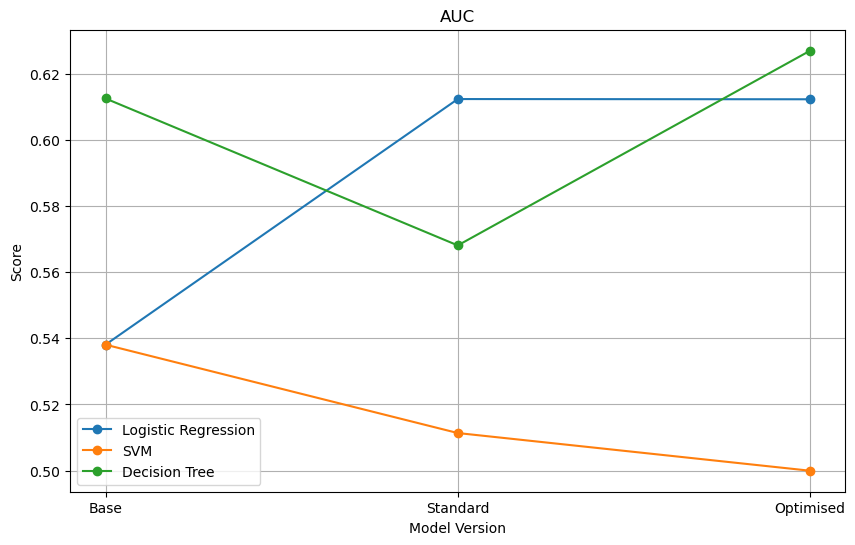

In [114]:
# Model Performance Evaluation: AUC
model_versions = ['Base', 'Standard', 'Optimised']
auc_log = [base_accuracy, log_auc_scaled, auc_final_log]
auc_svm = [base_accuracy, svc_auc_scaled, auc_final_svm]
auc_dT = [dT_base_accuracy, dT_auc, auc_final_dT]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(model_versions, auc_log, marker='o', label='Logistic Regression')
plt.plot(model_versions, auc_svm, marker='o', label='SVM')
plt.plot(model_versions, auc_dT, marker='o', label='Decision Tree')

plt.xlabel('Model Version')
plt.ylabel('Score')
plt.title('AUC')
plt.legend()
plt.grid(True)
plt.savefig('AUC.png', dpi=300)
plt.show()

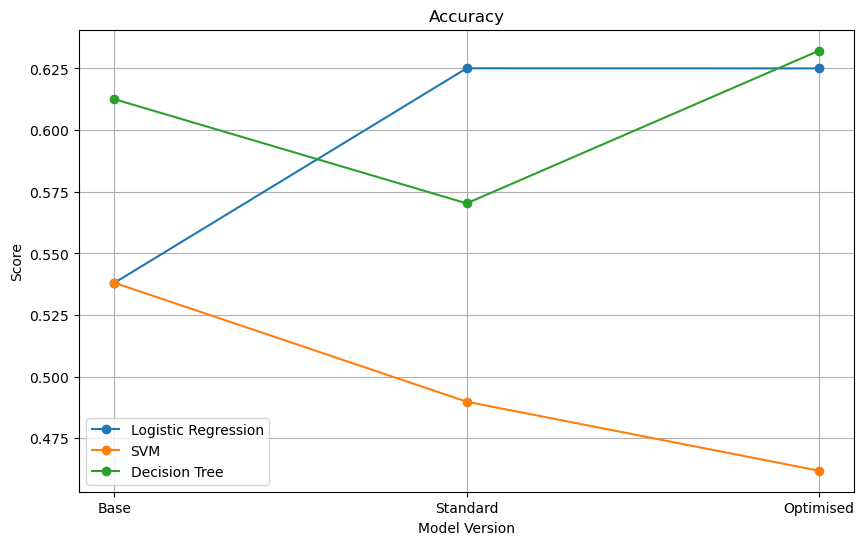

In [116]:
# Model Performance Evaluation: AUC
model_versions = ['Base', 'Standard', 'Optimised']
accuracy_log = [base_accuracy, log_accuracy_scaled, accuracy_final_log]
accuracy_svm = [base_accuracy, svc_accuracy_scaled, accuracy_final_svm]
accuracy_dT = [dT_base_accuracy, dT_accuracy, accuracy_final_dT]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(model_versions, accuracy_log, marker='o', label='Logistic Regression')
plt.plot(model_versions, accuracy_svm, marker='o', label='SVM')
plt.plot(model_versions, accuracy_dT, marker='o', label='Decision Tree')

plt.xlabel('Model Version')
plt.ylabel('Score')
plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('Accuracy.png', dpi=300)
plt.show()

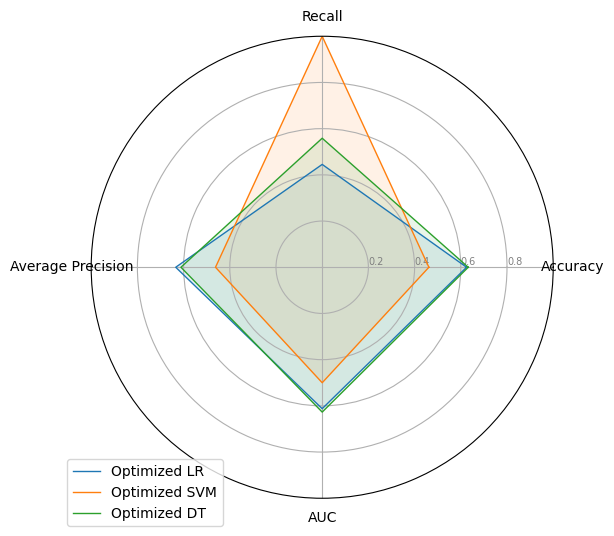

In [136]:
from math import pi

# Data
categories = ['Accuracy', 'Recall', 'Average Precision', 'AUC']
models = {
    'Optimized LR': [accuracy_final_log, recall_final_log, precision_final_log, auc_final_log],
    'Optimized SVM': [accuracy_final_svm, recall_final_svm, precision_final_svm, auc_final_svm],
    'Optimized DT': [accuracy_final_dT, recall_final_dT, precision_final_dT, auc_final_dT],
}

# Number of variables
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variables)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0, 1)

# Plot each model
for model, values in models.items():
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 0.1))

plt.savefig('OptimisedMetrics.png', dpi=300)

plt.show()
